# Aula 7 - Tratamento de Dados - Parte 2

Nessa aula, iremos tratar dos seguintes conteúdos:

- Detecção de Outliers


## IDWT

<img src="https://i0.wp.com/www.r-exercises.com/wp-content/uploads/2017/05/monitor.png?resize=275%2C140" width=600>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

__3)__ Explore o dataset de Penguins do Seaborn, identifique problemas com os dados e faça as correções adequadas

## 

## Detecção de Outliers

**Relembrando - outliers, pontos "fora-da-curva" ou pontos aberrantes** : exemplos ou instâncias que, dentre do espaço de possíveis valores, recaem num intervalo *fora* daquele relativo a maior parte dos exemplos de uma base de dados.

Detectar outliers por meio de análise exploratória é útil para entender o comportamento da base de dados.

Existem também métodos **estatísticos** e de **aprendizado de máquina** que auxiliam nesse processo e que podem facilitar essa análise, detectando *outliers* de forma automática.

1. Dispersão: desvio padrão e intervalo interquartil
2. Distribuição: Normal univaridada
3. Agrupamento

In [3]:
# https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent
df_outliers = pd.read_csv("../datasets/houses_to_rent.csv")
df_outliers.head()

,city,area,rooms,bathroom,parking spaces,floor,hoa,rent,tax,insurance,total,page hits,days available,interactions,weeks available,type
0,São Paulo,70.0,2.0,1,1.0,7,2065,3300,211,42,5618.0,324,23,108,3,flat
1,São Paulo,320.0,4.0,4,2.0,20,1200,4960,1750,63,7973.0,720,78,240,11,flat
2,Porto Alegre,80.0,1.0,1,1.0,6,1000,2800,nr,41,3841.0,64,269,128,38,flat
3,Porto Alegre,51.0,1.0,1,NaN,2,270,1112,22,17,1421.0,46,73,92,10,flat
4,São Paulo,25.0,1.0,1,NaN,1,0,800,25,11,836.0,1548,78,516,11,flat


city                object
area               float64
rooms              float64
bathroom             int64
parking spaces     float64
floor               object
hoa                  int64
rent                 int64
tax                 object
insurance            int64
total              float64
page hits            int64
days available       int64
interactions         int64
weeks available      int64
type                object
dtype: object

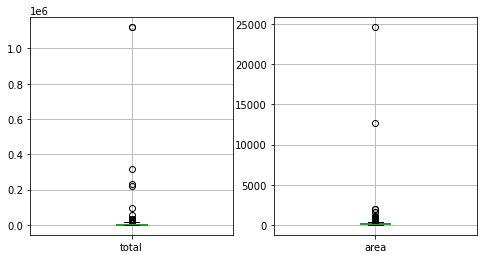

In [30]:
plt.figure(figsize=(8,4))
plt.subplot(121); df_outliers.boxplot(['total'])
plt.subplot(122); df_outliers.boxplot(['area'])
plt.show()

###  Desvio padrão e amplitude inter-quartil (por dispersão)

Para cada atributo, podemos estudar como os valores estão relacionados com a dispersão dos dados.

Entre as medidas de dispersão temos:
* desvio padrão amostral (*standard deviation*)
    Seja $\mu$ a média de uma variável,
    $$\sigma = \frac{\sqrt{ \sum_i (x_i - \mu)^2}}{n-1}$$


* amplitude - ou intervalo - interquartil (IQR, *interquartile range*)
    Sejam:
    - $Q_{1}$ o valor relativo aos primeiros 25% dados,
    - $Q_{2}$ o valor relativo aos primeiros 50% dados (mediana),
    - $Q_{3}$ o valor relativo aos primeiros 75% dos dados,
    
    $$IQR = Q_{3} - Q_{1}$$

,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11687.000000,11686.000000,11765.000000,8800.000000,1.176500e+04,11765.000000,11765.000000,1.176500e+04,11765.000000,11765.000000,11765.000000,11765.000000
mean,145.652691,2.496406,2.280408,2.181705,1.162632e+03,4033.429154,56.525032,5.622370e+03,593.139992,73.644454,228.023969,10.307012
std,288.676311,1.165594,1.445071,1.519448,1.486720e+04,3564.190560,97.487374,1.579576e+04,559.727661,35.725794,174.183959,5.101312
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,200.000000,3.000000,2.635000e+02,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,1.600000e+02,1600.000000,22.000000,2.176000e+03,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,5.610000e+02,2790.000000,37.000000,3.762000e+03,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1.300000e+03,5100.000000,70.000000,6.990000e+03,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,1.117000e+06,45000.000000,6000.000000,1.119892e+06,6444.000000,358.000000,2148.000000,51.000000


In [100]:
# selecionando segundo o total


IQR = 4814.00
media = 5622.37, desvio padrao = 15795.76


In [ ]:
# Valor t -> é a quantidade de vezes que vamos somar ou subtrair o desvio padrao

In [101]:
# apenas outliers segundo std

# apenas inliers segundo std


,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,11680.000000,11679.000000,11758.000000,8796.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000,11758.000000
mean,145.593408,2.496447,2.279469,2.180991,930.645348,4028.211771,56.452373,5356.795348,593.101718,73.640330,227.988774,10.306430
std,288.705325,1.165218,1.444316,1.518349,1151.665281,3541.282533,97.326654,4566.356503,559.773061,35.730994,174.198150,5.102046
min,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000,3.000000,263.500000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,2.000000,1.000000,1.000000,160.000000,1600.000000,22.000000,2173.250000,144.000000,51.000000,100.000000,7.000000
50%,91.000000,2.000000,2.000000,2.000000,560.000000,2790.000000,37.000000,3760.000000,432.000000,72.000000,180.000000,10.000000
75%,190.000000,3.000000,3.000000,3.000000,1300.000000,5100.000000,70.000000,6990.000000,900.000000,93.000000,312.000000,13.000000
max,24606.000000,10.000000,25.000000,12.000000,32000.000000,30000.000000,6000.000000,32751.000000,6444.000000,358.000000,2148.000000,51.000000


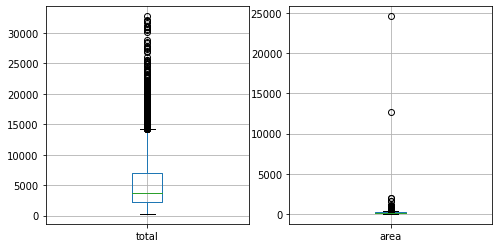

In [104]:
# apenas outliers segundo IQR

# apenas inliers segundo IQR


,area,rooms,bathroom,parking spaces,hoa,rent,insurance,total,page hits,days available,interactions,weeks available
count,10993.000000,10994.000000,11068.000000,8135.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000
mean,128.370690,2.416409,2.144651,2.032821,820.518883,3432.489971,47.701391,4557.751599,585.927720,73.661637,226.455728,10.309722
std,166.343212,1.132361,1.338094,1.401387,893.913079,2538.420532,72.726753,3233.790034,555.951272,35.654738,172.718755,5.091272
min,1.000000,1.000000,1.000000,1.000000,0.000000,200.000000,3.000000,263.500000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,1.000000,170.000000,1550.000000,21.000000,2092.000000,144.000000,51.000000,96.000000,7.000000
50%,86.000000,2.000000,2.000000,2.000000,547.000000,2530.000000,35.000000,3544.500000,400.000000,72.000000,180.000000,10.000000
75%,164.000000,3.000000,3.000000,3.000000,1200.000000,4500.000000,63.000000,6230.000000,900.000000,93.000000,312.000000,13.000000
max,12732.000000,10.000000,25.000000,12.000000,8000.000000,13500.000000,6000.000000,14199.000000,6444.000000,358.000000,2148.000000,51.000000


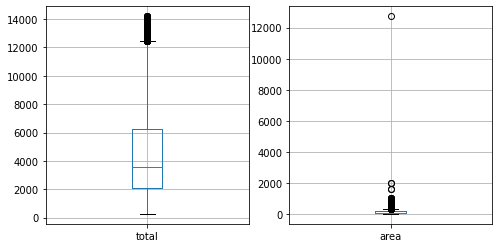

Vamos escrever uma função para remoção de outliers segundo o IQR:

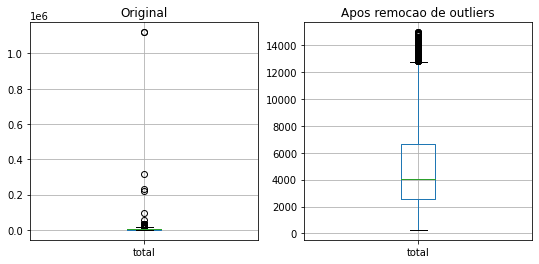

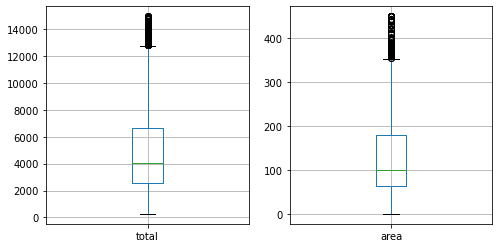

Dados originais:  11765
Após remoção de outliers:  7461


## 

## Exercícios

__1)__ Utilizando a base de dados **antes** da remoção de outliers, elimine todas as linhas duplicadas. Quantas linhas foram removidas?

__2)__ Utilizando a base de dados **após** da remoção de outliers (`data_out`), elimine todas as linhas duplicadas. Quantas linhas foram removidas?

## Funções utéis

#### A função apply
É uma função que possibilita que definamos uma função e apliquemos ela em todas as linhas do nosso dataset

In [6]:
## Vamos ver no dataset de gorjetas
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### A função get dummies

In [7]:
## Vamos ver para sex

## Exercícios

__3)__ Utilizando o dataset de insurance, pede-se:
- Crie dummies para a coluna region
- Calcule a tarifa por pessoa (assumindo que os filhos estão inclusos no cálculo e que um fumante vale por 2 pessoas)

In [9]:
insurance = pd.read_csv('../datasets/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Links, Artigos e Referências:

- [7 Must know Data Wrangling operations with Python Pandas](https://towardsdatascience.com/7-must-know-data-wrangling-operations-with-python-pandas-849438a90d15), artigo publicado pelo Towards Data Science;
- [Data Wrangling in Pandas](https://towardsdatascience.com/data-wrangling-in-pandas-a-downloadable-cheatsheet-84326d255a7b), artigo publicado pelo Towards Data Science;
- [A Checklist for Data Wrangling](https://towardsdatascience.com/a-checklist-for-data-wrangling-8f106c093fef), artigo publicado pelo Towards Data Science;
- [The ultimate Guide to Data Cleaning](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4), artigo publicado pelo Towards Data Science.